In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import random
import shutil
from PIL import Image
import seaborn as sns
from matplotlib.image import imread
import pathlib
import copy

## 1. Dataset Selection and Exploration

In [14]:
# Make new base directory
original_data_dir = "C:/Users/Owner/Downloads/Multi-class Weather Dataset"
base_dir = 'C:/Users/Owner/Downloads/weather_dataset/'
os.makedirs(base_dir, exist_ok=True)

In [5]:
# Creat three folders (train, validation and test)
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

val_dir = os.path.join(base_dir, 'validation')
os.makedirs(val_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [6]:
# In train folder Creat four folders  (Cloudy, Rain, Shine, Sunrise)

train_Cloudy_dir = os.path.join(train_dir, 'Cloudy')
os.makedirs(train_Cloudy_dir, exist_ok=True)

train_Rain_dir = os.path.join(train_dir, 'Rain')
os.makedirs(train_Rain_dir, exist_ok=True)

train_Shine_dir = os.path.join(train_dir, 'Shine')
os.makedirs(train_Shine_dir, exist_ok=True)

train_Sunrise_dir = os.path.join(train_dir, 'Sunrise')
os.makedirs(train_Sunrise_dir, exist_ok=True)

In [7]:
# In Validation folder Creat four folders  (Cloudy, Rain, Shine, Sunrise)

val_Cloudy_dir = os.path.join(val_dir, 'Cloudy')
os.makedirs(val_Cloudy_dir, exist_ok=True)

val_Rain_dir = os.path.join(val_dir, 'Rain')
os.makedirs(val_Rain_dir, exist_ok=True)

val_Shine_dir = os.path.join(val_dir, 'Shine')
os.makedirs(val_Shine_dir, exist_ok=True)

val_Sunrise_dir = os.path.join(val_dir, 'Sunrise')
os.makedirs(val_Sunrise_dir, exist_ok=True)

In [8]:
# In test folder Creat four folders  (Cloudy, Rain, Shine, Sunrise)

test_Cloudy_dir = os.path.join(test_dir, 'Cloudy')
os.makedirs(test_Cloudy_dir, exist_ok=True)

test_Rain_dir = os.path.join(test_dir, 'Rain')
os.makedirs(test_Rain_dir, exist_ok=True)

test_Shine_dir = os.path.join(test_dir, 'Shine')
os.makedirs(test_Shine_dir, exist_ok=True)

test_Sunrise_dir = os.path.join(test_dir, 'Sunrise')
os.makedirs(test_Sunrise_dir, exist_ok=True)

In [9]:
classes = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

In [27]:
# split the images randomly into training 70%, validation 15% and test 15%
# copy the images from original directory to new directory

def split_dataset(original_data_dir, base_dir, classes, train_ratio=0.7, val_ratio=0.15):
    for category in classes:
        category_dir = os.path.join(original_data_dir, category)
        images = os.listdir(category_dir)

        random.shuffle(images)

        # Calculate split indices for train, validation, and test sets
        train_size = int(len(images) * train_ratio)
        val_size = int(len(images) * val_ratio)
        test_size = len(images) - train_size - val_size

        # Split the dataset
        train_images = images[:train_size]
        val_images = images[train_size:train_size + val_size]
        test_images = images[train_size + val_size:]

        # Copy training images
        for image in train_images:
            src = os.path.join(category_dir, image)
            dst = os.path.join(train_dir, category, image)
            shutil.copyfile(src, dst)

        # Copy validation images
        for image in val_images:
            src = os.path.join(category_dir, image)
            dst = os.path.join(val_dir, category, image)
            shutil.copyfile(src, dst)

        # Copy testing images
        for image in test_images:
            src = os.path.join(category_dir, image)
            dst = os.path.join(test_dir, category, image)
            shutil.copyfile(src, dst)

    print("Dataset split into train, validation, and test complete!")

In [26]:
split_dataset(original_data_dir, base_dir, classes)

Dataset split into train, validation, and test complete!


In [32]:
def plot_images_with_labels(base_dir, classes, dataset_type='train', num_images_per_class=3):

    plt.figure(figsize=(15, 10))

    for idx, category in enumerate(classes):
        category_dir = os.path.join(base_dir, dataset_type, category)
        images = os.listdir(category_dir)

        selected_images = random.sample(images, num_images_per_class)

        for i, image_name in enumerate(selected_images):
            img_path = os.path.join(category_dir, image_name)
            img = Image.open(img_path)

            # Plot each image in the grid (4 rows, 3 columns per class)
            plt.subplot(len(classes), num_images_per_class, idx * num_images_per_class + i + 1)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

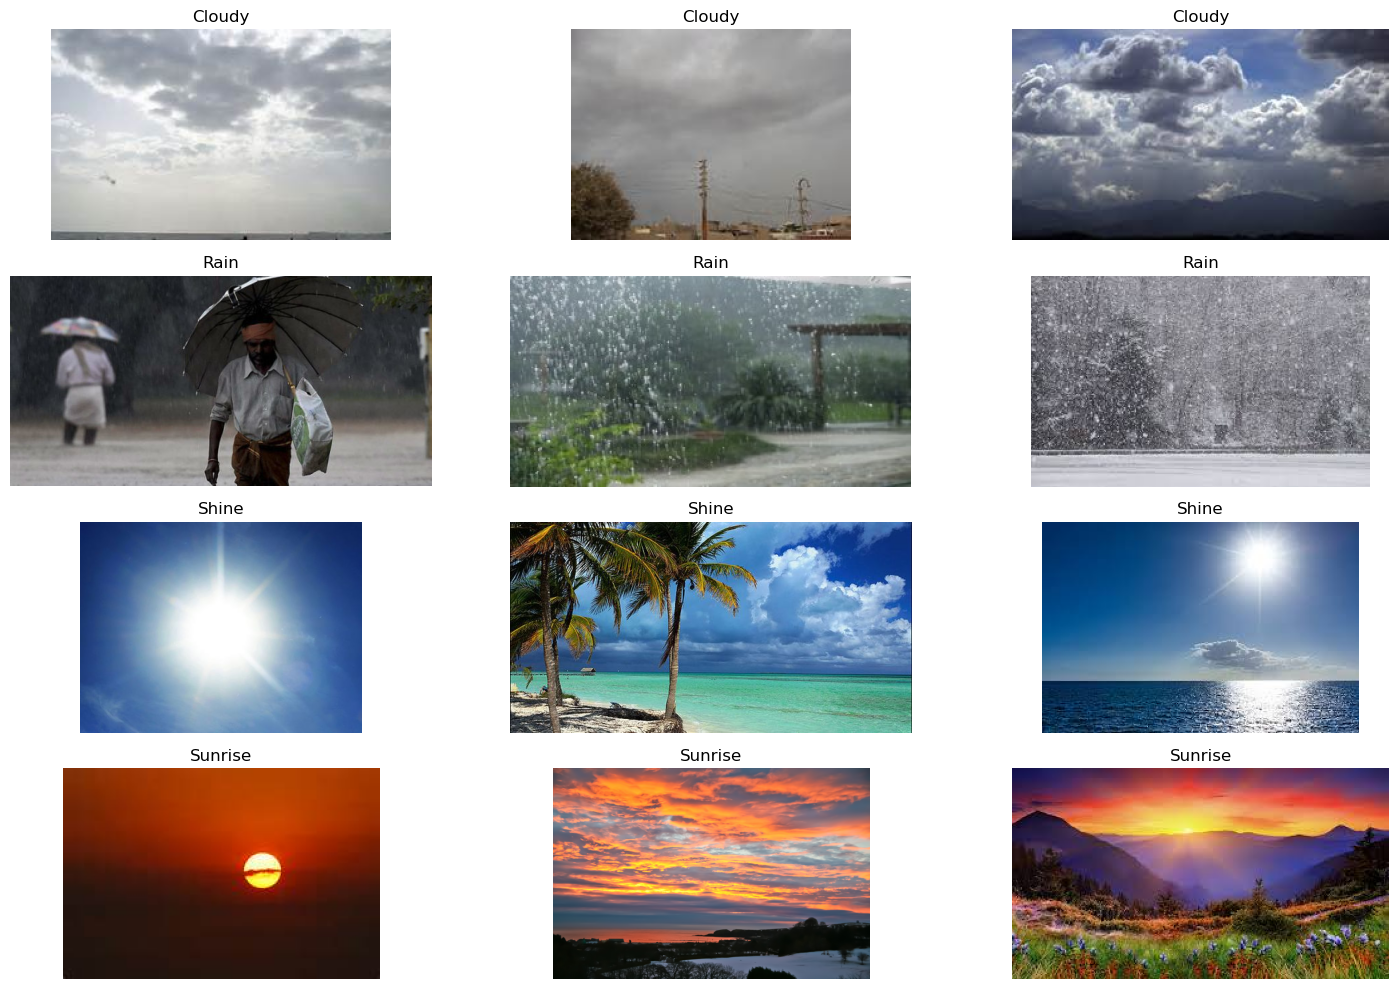

In [33]:
plot_images_with_labels(base_dir=base_dir, classes=classes, dataset_type='train', num_images_per_class=3)

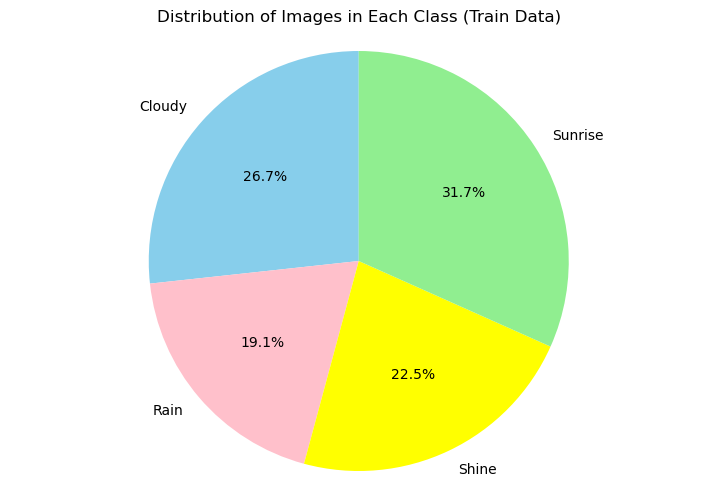

Traing Cloudy images are: 210
Traing Rain images are: 150
Traing Shine images are: 177
Traing Sunrise images are: 249


In [38]:
nimgs = {}

for i in classes:
    nimages = len(os.listdir((base_dir+"train/") + i + '/'))
    nimgs[i] = nimages


colors = ['skyblue', 'pink', 'yellow', 'lightgreen']

plt.figure(figsize=(9,6))
plt.pie(list(nimgs.values()), labels=list(nimgs.keys()), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Images in Each Class (Train Data)')
plt.axis('equal')
plt.show()

for i in classes:
    print('Training {} images are: '.format(i)+str(len(os.listdir((base_dir+"train/") + i))))

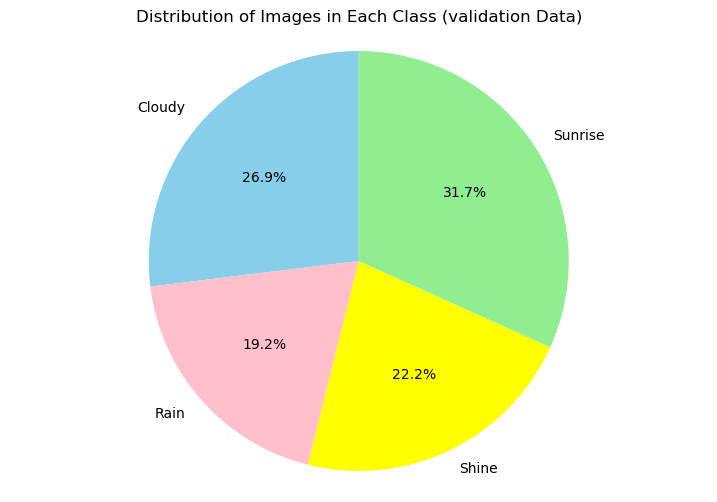

Validation Cloudy images are: 45
Validation Rain images are: 32
Validation Shine images are: 37
Validation Sunrise images are: 53


In [41]:
nimgs = {}

for i in classes:
    nimages = len(os.listdir((base_dir+"validation/") + i + '/'))
    nimgs[i] = nimages


colors = ['skyblue', 'pink', 'yellow', 'lightgreen']

plt.figure(figsize=(9,6))
plt.pie(list(nimgs.values()), labels=list(nimgs.keys()), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Images in Each Class (validation Data)')
plt.axis('equal')
plt.show()

for i in classes:
    print('Validation {} images are: '.format(i)+str(len(os.listdir((base_dir+"validation/") + i))))

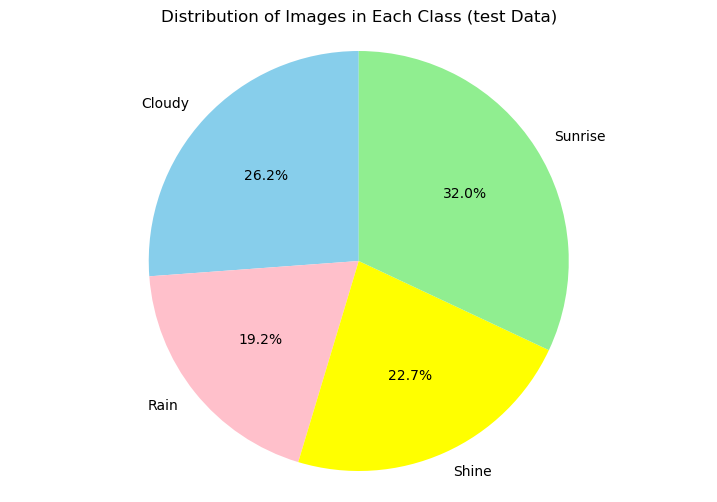

Test Cloudy images are: 45
Test Rain images are: 33
Test Shine images are: 39
Test Sunrise images are: 55


In [42]:
nimgs = {}

for i in classes:
    nimages = len(os.listdir((base_dir+"test/") + i + '/'))
    nimgs[i] = nimages


colors = ['skyblue', 'pink', 'yellow', 'lightgreen']

plt.figure(figsize=(9,6))
plt.pie(list(nimgs.values()), labels=list(nimgs.keys()), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Images in Each Class (test Data)')
plt.axis('equal')
plt.show()

for i in classes:
    print('Test {} images are: '.format(i)+str(len(os.listdir((base_dir+"test/") + i))))

In [43]:
# Dataset Loading with Transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}


data_dirs = {'train': train_dir, 'validation': val_dir, 'test': test_dir}
image_datasets = {x: datasets.ImageFolder(data_dirs[x], data_transforms[x]) for x in ['train', 'validation', 'test']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True) for x in ['train', 'validation', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'validation', 'test']}
class_names = image_datasets['train'].classes

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 2. Transfer Learning

In [52]:
model = models.vgg16(weights='IMAGENET1K_V1').to(device)

In [53]:
# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

In [54]:
# Replace the final layer to match the number of classes
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, len(class_names))

In [57]:
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [58]:
# Loss function and SGD (stochastioc gradient descent) optimizer (only optimize the final layer)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier[6].parameters(), lr=0.001, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

## 3. Model Training and Validation

In [62]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_loss, val_loss, train_acc, val_acc = [], [], [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Save the best model
            if phase == 'validation' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            # Collect loss and accuracy for plotting
            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc)
            else:
                val_loss.append(epoch_loss)
                val_acc.append(epoch_acc)

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best validation Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model, train_loss, val_loss, train_acc, val_acc

In [63]:
# Train the model
model, train_loss, val_loss, train_acc, val_acc = train_model(model, criterion, optimizer, scheduler, num_epochs=25)

Epoch 1/25
----------
train Loss: 0.8907 Acc: 0.6412
validation Loss: 0.3830 Acc: 0.9042
Epoch 2/25
----------
train Loss: 0.3149 Acc: 0.9186
validation Loss: 0.2570 Acc: 0.9162
Epoch 3/25
----------
train Loss: 0.2441 Acc: 0.9326
validation Loss: 0.2200 Acc: 0.9341
Epoch 4/25
----------
train Loss: 0.2282 Acc: 0.9377
validation Loss: 0.2174 Acc: 0.9461
Epoch 5/25
----------
train Loss: 0.2021 Acc: 0.9440
validation Loss: 0.1946 Acc: 0.9401
Epoch 6/25
----------
train Loss: 0.1942 Acc: 0.9440
validation Loss: 0.1869 Acc: 0.9401
Epoch 7/25
----------
train Loss: 0.1854 Acc: 0.9364
validation Loss: 0.1768 Acc: 0.9401
Epoch 8/25
----------
train Loss: 0.1550 Acc: 0.9542
validation Loss: 0.1773 Acc: 0.9401
Epoch 9/25
----------
train Loss: 0.1698 Acc: 0.9504
validation Loss: 0.1757 Acc: 0.9401
Epoch 10/25
----------
train Loss: 0.1944 Acc: 0.9402
validation Loss: 0.1768 Acc: 0.9461
Epoch 11/25
----------
train Loss: 0.1742 Acc: 0.9453
validation Loss: 0.1755 Acc: 0.9461
Epoch 12/25
-------

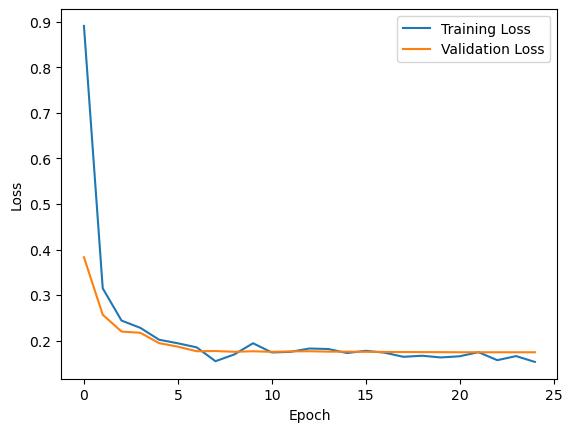

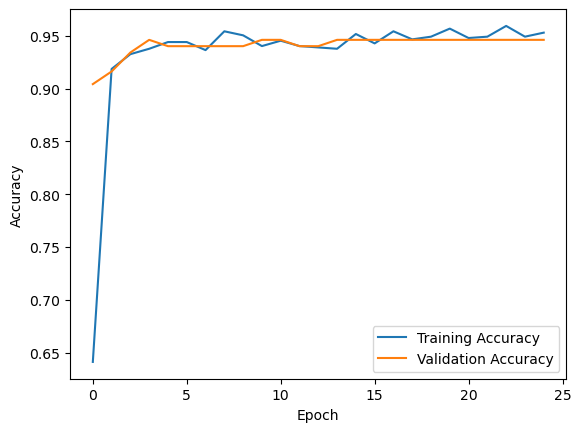

In [64]:
# Plot Training and Validation Loss/Accuracy Curves
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
# Evaluate on Test Set
model.eval()
test_corrects = 0

for inputs, labels in dataloaders['test']:
    inputs, labels = inputs.to(device), labels.to(device)
    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
    test_corrects += torch.sum(preds == labels.data)

test_acc = test_corrects.double() / dataset_sizes['test']
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.9128


## 4. Save the trained model

In [66]:
model_path = "weather_classification_model.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to weather_classification_model.pth
